## Day 22 Lecture 2 Assignment

In this assignment, we will do apply the feature engineering techniques we have learned to create new features from existing ones. We will be using both the FIFA ratings dataset and the Chicago traffic crash dataset.

In [54]:
%matplotlib inline
%reload_ext nb_black
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
import datetime

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
crash_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv"
)
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

We will start with the FIFA soccer ratings dataset. From our EDA in the previous exercise, we saw that most ratings appeared to be somewhat normally distributed, occasionally with long tails. Choose one of the ratings (we will choose Curve) and apply the following transformations:

- Log transformation
- Standardization
- Quantile transformation

Plot the resulting histograms. How do these transformations affect the resulting distributions?

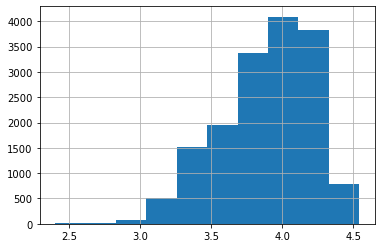

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# answer goes here
soccer_data["log_curve"] = np.log(soccer_data["Curve"])
soccer_data["log_curve"].hist()

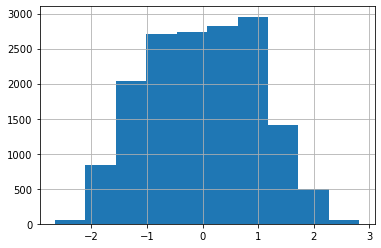

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
soccer_data["z-curve"] = stats.zscore(soccer_data["Curve"])
soccer_data["z-curve"].hist()

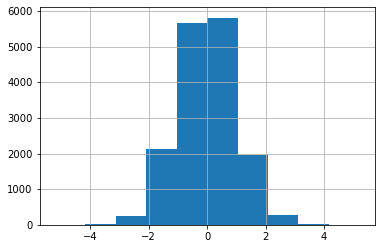

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
scaler = QuantileTransformer(output_distribution="normal")
scaler.fit(soccer_data[["Curve"]])

scaled = scaler.transform(soccer_data[["Curve"]])

soccer_data["quantile_curve"] = scaled
soccer_data["quantile_curve"].hist()

Next, we will switch our focus to the Chicago traffic crashes dataset. We will create several new features using several common feature engineering techniques.

Start by considering the crash date column. It is usually difficult to directly feed datetimes into machine learning models, but we can extract several features from the datetime that may be more suitable for our use case. 

First, if the CRASH_DATE column is not already a datetime field (it may be read in as a string by default), convert it to a datetime. Then, create three new columns, CRASH_HOUR, CRASH_DAY_OF_WEEK, and CRASH_MONTH, that extract the relevant pieces of information from the crash date field. CRASH_HOUR should be numeric, while CRASH_DAY_OF_WEEK and CRASH_MONTH should be strings (e.g. "Monday" and "December", not 1 and 12).

In [23]:
# answer goes here
crash_data['CRASH_DATE'] = pd.to_datetime(crash_data['CRASH_DATE'])
 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
crash_data["CRASH_MONTH"] = crash_data["CRASH_DATE"].dt.month_name()
crash_data["CRASH_DAY"] = crash_data["CRASH_DATE"].dt.day_name()
crash_data["CRASH_HOUR"] = crash_data["CRASH_DATE"].dt.hour

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372585 entries, 0 to 372584
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   RD_NO                          372585 non-null  object        
 1   CRASH_DATE                     372585 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             372585 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         372585 non-null  object        
 4   DEVICE_CONDITION               372585 non-null  object        
 5   WEATHER_CONDITION              372585 non-null  object        
 6   LIGHTING_CONDITION             372585 non-null  object        
 7   FIRST_CRASH_TYPE               372585 non-null  object        
 8   TRAFFICWAY_TYPE                372585 non-null  object        
 9   LANE_CNT                       198548 non-null  float64       
 10  ALIGNMENT                      372585 non-null  object        
 11  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next, we will work through an example that involves combining two existing features together to make a new one. Convert the DATE_POLICE_NOTIFIED column into a datetime (if it isn't one already), and create a new feature called "REPORTING_DELAY" which corresponds to the number of hours between the crash actually occurring and the police being notified. 

Plot a histogram and a frequency table of the features - are the results reasonable? If there are unusual results, which ones are they and what steps could we consider taking to address them (if such steps are necessary)?

In [32]:
# answer goes here
crash_data['DATE_POLICE_NOTIFIED'] = pd.to_datetime(crash_data['DATE_POLICE_NOTIFIED'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
crash_data["REPORTING_DELAY"] = (
    crash_data["DATE_POLICE_NOTIFIED"] - crash_data["CRASH_DATE"]
).dt.components.hours

crash_data.REPORTING_DELAY.value_counts()

0     229533
1      46968
2      17339
3       9931
4       6843
5       5059
6       4128
23      4054
22      3615
7       3463
21      3432
9       3421
8       3386
10      3307
20      3287
19      3169
18      3084
17      3066
11      2847
12      2739
16      2682
14      2489
15      2427
13      2316
Name: REPORTING_DELAY, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

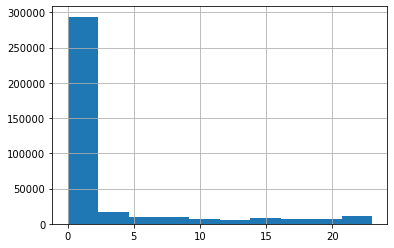

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
crash_data["REPORTING_DELAY"].hist()

Finally, we will generate a new geographical feature from the BEAT_OF_OCCURRENCE field. This field contains 4-digit identifiers corresponding to areas within Chicago; however, some values may be shorter if the leading digit is 0 (i.e. beat "0114" is represented as "114").

Start by converting the the BEAT_OF_OCCURRENCE field into a string, dropping any unwanted characters that are present (chances are that this field was read in as a number and that "114" is represented as "114.0"; find a way to drop the ".0"), and adding the appropriate number of leading 0s so that every beat is four digits.

In [74]:
# answer goes here
"0" * (4 - len(str(int(crash_data["BEAT_OF_OCCURRENCE"][0])))) + str(
    int(crash_data["BEAT_OF_OCCURRENCE"][0])
)

crash_data["BEAT_FILLED"] = (
    crash_data["BEAT_OF_OCCURRENCE"]
    .fillna(value=9999)
    .apply(lambda x: "0" * (4 - len(str(int(x)))) + str(int(x)))
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
crash_data["BEAT_FILLED"].value_counts()

1834    5482
0114    4431
0122    4389
1831    4382
0813    3780
        ... 
0422     327
1653     129
1655      55
1652      53
9999       4
Name: BEAT_FILLED, Length: 275, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As it turns out, the first two digits of each beat correspond to a higher-level geographic area. For example, the higher-level beat "24" corresponds to a larger geographic area that is subdivided into beats 2411, 2412, etc. See below for a map illustrating this (in the map, the higher-level codes are three digits, but the first digit is always a zero):

https://news.wttw.com/sites/default/files/Map%20of%20Chicago%20Police%20Districts%20and%20Beats.pdf

Create a new feature called BEAT_TWO_DIGIT that corresponds to the higher-level two-digit geographic area.

As a side note, US zip codes work much the same way:

https://www.unitedstateszipcodes.org/images/zip-codes/zip-codes.png

This is a very common feature engineering technique for US zip codes. Many data sets will contain hundreds or thousands or zip codes, and attempting to feed a categorical variable with a very large number of levels into a model can often lead to problems (imagine trying to one-hot encode this; the number of columns would explode, and most of the columns would be very sparse.) Rolling up zip codes to a higher level loses some detail but greatly mitigates the issue of too many categories while still providing useful geographic insights on many occassions.

In [77]:
# answer goes here
crash_data['BEAT_TWO_DIGIT'] = crash_data['BEAT_FILLED'].apply(lambda x: x[:2])



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0         01
1         06
2         03
3         18
4         19
          ..
372580    08
372581    16
372582    05
372583    17
372584    10
Name: BEAT_TWO_DIGIT, Length: 372585, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>